In [1]:
# Add module to path
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# Imports
from aoc23.utils import read_input
import math
import matplotlib.pyplot as plt

In [6]:
input_6 = read_input(6)

## Part 1

The first part of the [Day 6 puzzle](https://adventofcode.com/2023/day/6) sees us entering a toy boat race, with specially designed boats - they each have a red button on the top which 'charges' up the boat; the longer the button is pressed, the faster the boat will travel, but the less time it will have to race. Here is the relevant section describing how this is computed:

>For example:
>
```
Time:      7  15   30
Distance:  9  40  200
```
> 
>This document describes three races:
>
>The first race lasts 7 milliseconds. The record distance in this race is 9 millimeters.
>The second race lasts 15 milliseconds. The record distance in this race is 40 millimeters.
>The third race lasts 30 milliseconds. The record distance in this race is 200 millimeters.
>Your toy boat has a starting speed of zero millimeters per millisecond. For each whole millisecond you spend at the beginning of the race holding down the button, the boat's speed increases by one millimeter per millisecond.

First, load up the data showing the times and distances we are dealing with:

In [12]:
times, distances = (
    [int(x) for x in line.split()[1:]] 
    for line in input_6
)
times, distances

([45, 98, 83, 73], [295, 1734, 1278, 1210])

Now, consider a race taking time $t$ milliseconds, and with a record distance $d$ millimetres. If we use $x$ milliseconds to charge up the boat, it will travel with speed $x$ milliseconds per second, for the remaining $t-x$ milliseconds of the race. It will therefore cover $x(t-x)$ millimetres of distance; in order to beat the record distance $d$, we must find values of $x$ which satisfy the inequality

$$
x^2 - tx + d < 0.
$$

For $x\in\mathbb{R}$, this inequality is solved by $x$ satisfying:
$$
\frac{t - \sqrt{t^2 - 4d}}{2} < x < \frac{t + \sqrt{t^2 - 4d}}{2} 
$$
Implementing these bounds as a function:

In [23]:
def bounds(time: int, distance: int) -> tuple[float]:
    disc = time**2 - 4*distance
    if disc < 0:
        raise ValueError('No real solutions!')
    
    sqrt_disc = math.sqrt(disc)
    return (0.5 * (time - sqrt_disc), 0.5 * (time + sqrt_disc))

However, as $x\in\mathbb{N}$, only the lattice points in this interval need to be found. This is easily done by taking the ceiling/floor of the lower/upper solution respectively, and taking the difference (plus one):

In [28]:
def num_solutions(time: int, distance: int, eps=0.1):
    lower_bound, upper_bound = bounds(time, distance + eps)
    
    return math.floor(upper_bound) - math.ceil(lower_bound) + 1

Note the presence of the `eps` parameter; this is to address the case when the discriminant is an exact square. If that is the case, then the upper and lower bounds are exact integers, and so would be counted by the above function. However, we are only looking for solutions to the strict inequality - exact inequality corresponds to solutions where the covered distance is equal to the record distance, but does not exceed it.

By adding a small `eps` factor to the distance, the quadratic curve from the inequality is shifted up slightly. If chosen small enough, it will cause the roots of the original quadratic to be shifted out of the interval, without changing the number of solutions when the bounds are not integers. To see this, consider the original toy boat setup, where the record distance to beat is $d$: note that adding  $\varepsilon<1$ to $d$ will rule out solutions where the achieved distance is exactly $d$, but not rule out any other solution, as the next possible realisable distance is $d+1$ (realisable distances are always integers).

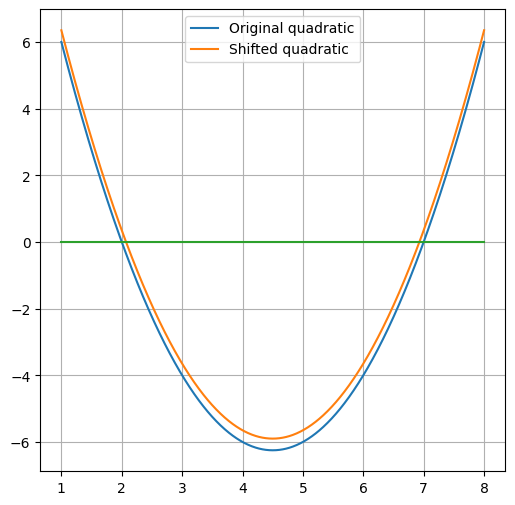

In [68]:
import numpy as np

t=9
d=14

de = d + 0.35

fig, ax = plt.subplots(figsize=(6, 6))
x = np.linspace(1, t-1, 1000)
y = x*x - t*x + d
ye = x*x - t*x + de

major_ticks = np.arange(0, t+1, 1)
ax.set_xticks(major_ticks)

ax.plot(x, y, label='Original quadratic')
ax.plot(x, ye, label='Shifted quadratic')
ax.plot(x, 0*x)
ax.grid()
ax.legend()
fig.savefig('day6_plot.png')

Applying this to the provided times and distances, and multiplying:

In [29]:
math.prod([num_solutions(t, d) for t, d in zip(times, distances)])

1413720

So the answer to part 1 is: __1413720__.

## Part 2

In this part, we are told that the times and distances in the previous part were actually a result of a kerning error - there is actually only one time and distance:

In [ ]:
times, distances = (
    [int(x) for x in line.split()[1:]] 
    for line in input_6
)
times, distances

In [37]:
time, distance = [int(line.replace(" ", "").split(':')[1]) for line in input_6]

In [38]:
time, distance

(45988373, 295173412781210)

Thankfully, we already have everything we need to compute the number of solutions:

In [40]:
num_solutions(time, distance)

30565288

And so the answer to part 2 is: __30565288__.